# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_duolingo_9.csv")
df.head()

,userName,score,at,content
0,Kayla Keke,5,2024-04-05 14:37:28,Bagus banget
1,Eshraka el_khurry,5,2024-04-05 14:29:10,sangat bagus untuk belajar bahasa inggris. say...
2,Vin Jasmin,5,2024-04-05 14:25:51,Apk nya membantu aku untuk belajar lebih lewat...
3,Syanella Nur Afifah,3,2024-04-05 14:24:17,"bagus apk nya hehe,ngebantu banget"
4,Marguerite Sean,5,2024-04-05 14:19:49,Keren apknya bisa berubah logo apknya meski cu...


In [3]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Bagus banget,Kayla Keke,2024-04-05 14:37:28
1,sangat bagus untuk belajar bahasa inggris. say...,Eshraka el_khurry,2024-04-05 14:29:10
2,Apk nya membantu aku untuk belajar lebih lewat...,Vin Jasmin,2024-04-05 14:25:51
3,"bagus apk nya hehe,ngebantu banget",Syanella Nur Afifah,2024-04-05 14:24:17
4,Keren apknya bisa berubah logo apknya meski cu...,Marguerite Sean,2024-04-05 14:19:49
...,...,...,...
194,Bisa Memulai Dari Nol Student Inggris,HERI ANSYAH,2024-04-04 12:10:29
195,sangat membatu untuk yg mau bljr speak englis....,Mas Tuka,2024-04-04 11:57:36
196,menambah wawasan coy,arka nitimanta,2024-04-04 11:35:21
197,good,Hans Breganta,2024-04-04 11:28:43


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   199 non-null    object
 1   userName  199 non-null    object
 2   at        199 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,199,199,199
unique,186,199,198
top,good,Kayla Keke,2024-04-05 04:55:37
freq,5,1,2


# **Cleaning Data**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(199, 3)

In [7]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong
df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
df.shape

(186, 3)

In [12]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih

  return text

In [13]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,bagus banget,Kayla Keke,2024-04-05 14:37:28
1,sangat bagus untuk belajar bahasa inggris saya...,Eshraka el_khurry,2024-04-05 14:29:10
2,apk nya membantu aku untuk belajar lebih lewat...,Vin Jasmin,2024-04-05 14:25:51
3,bagus apk nya hehengebantu banget,Syanella Nur Afifah,2024-04-05 14:24:17
4,keren apknya bisa berubah logo apknya meski cu...,Marguerite Sean,2024-04-05 14:19:49
...,...,...,...
193,duo nya imutduo is so cute,Dylan Usman,2024-04-04 12:34:03
194,bisa memulai dari nol student inggris,HERI ANSYAH,2024-04-04 12:10:29
195,sangat membatu untuk yg mau bljr speak englisa...,Mas Tuka,2024-04-04 11:57:36
196,menambah wawasan coy,arka nitimanta,2024-04-04 11:35:21


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [15]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,bagus banget,Kayla Keke,2024-04-05 14:37:28
1,sangat bagus untuk belajar bahasa inggris saya...,Eshraka el_khurry,2024-04-05 14:29:10
2,aplikasi nya membantu aku untuk belajar lebih ...,Vin Jasmin,2024-04-05 14:25:51
3,bagus aplikasi nya hehengebantu banget,Syanella Nur Afifah,2024-04-05 14:24:17
4,keren aplikasinya bisa berubah logo aplikasiny...,Marguerite Sean,2024-04-05 14:19:49
...,...,...,...
193,duo nya imutduo is so cute,Dylan Usman,2024-04-04 12:34:03
194,bisa memulai dari nol student inggris,HERI ANSYAH,2024-04-04 12:10:29
195,sangat membatu untuk yang mau bljr speak engli...,Mas Tuka,2024-04-04 11:57:36
196,menambah wawasan coy,arka nitimanta,2024-04-04 11:35:21


In [16]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00


In [17]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,bagus banget,Kayla Keke,2024-04-05 14:37:28
1,sangat bagus belajar bahasa inggris sangat suk...,Eshraka el_khurry,2024-04-05 14:29:10
2,aplikasi nya membantu aku belajar lebih lewat ...,Vin Jasmin,2024-04-05 14:25:51
3,bagus aplikasi nya hehengebantu banget,Syanella Nur Afifah,2024-04-05 14:24:17
4,keren aplikasinya berubah logo aplikasinya mes...,Marguerite Sean,2024-04-05 14:19:49
...,...,...,...
193,duo nya imutduo is so cute,Dylan Usman,2024-04-04 12:34:03
194,memulai nol student inggris,HERI ANSYAH,2024-04-04 12:10:29
195,sangat membatu yang mau bljr speak englisand l...,Mas Tuka,2024-04-04 11:57:36
196,menambah wawasan coy,arka nitimanta,2024-04-04 11:35:21


In [18]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                                        [bagus, banget]
1      [sangat, bagus, belajar, bahasa, inggris, sang...
2      [aplikasi, nya, membantu, aku, belajar, lebih,...
3           [bagus, aplikasi, nya, hehengebantu, banget]
4      [keren, aplikasinya, berubah, logo, aplikasiny...
                             ...                        
193                    [duo, nya, imutduo, is, so, cute]
194                     [memulai, nol, student, inggris]
195    [sangat, membatu, yang, mau, bljr, speak, engl...
196                             [menambah, wawasan, coy]
198                 [aplikasi, nya, bagus, harus, bayar]
Name: content, Length: 186, dtype: object

In [19]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

tokenized = tokenized.apply(stemming)

tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_duolingo_9.csv', index = False)


In [20]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_duolingo_9.csv', encoding = 'latin1')
df_clean

,content
0,bagus banget
1,sangat bagus ajar bahasa inggris sangat suka s...
2,aplikasi nya bantu aku ajar lebih lewat hp jad...
3,bagus aplikasi nya hehengebantu banget
4,keren aplikasi ubah logo aplikasi meski cuma d...
...,...
181,duo nya imutduo is so cute
182,mulai nol student inggris
183,sangat batu yang mau bljr speak englisand lang...
184,tambah wawas coy


# **Translate**

In [22]:
# Menginstall Library easynmt
!pip install -U easynmt

  Using cached EasyNMT-2.0.2-py3-none-any.whl
  Using cached fasttext-0.9.2.tar.gz (68 kB)
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Us

In [25]:
import pandas as pd
from easynmt import EasyNMT

In [26]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_duolingo_9.csv', encoding='latin1')

In [27]:
source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [28]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

In [30]:
df2 = df_clean.fillna(method = 'pad')
df2

,content
0,bagus banget
1,sangat bagus ajar bahasa inggris sangat suka s...
2,aplikasi nya bantu aku ajar lebih lewat hp jad...
3,bagus aplikasi nya hehengebantu banget
4,keren aplikasi ubah logo aplikasi meski cuma d...
...,...
181,duo nya imutduo is so cute
182,mulai nol student inggris
183,sangat batu yang mau bljr speak englisand lang...
184,tambah wawas coy


In [31]:
df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_duolingo_9.csv')

In [32]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_duolingo_9.csv')
df2

,Unnamed: 0,content,content_en
0,0,bagus banget,Very good.
1,1,sangat bagus ajar bahasa inggris sangat suka s...,Very nice English teaching very much. Very hel...
2,2,aplikasi nya bantu aku ajar lebih lewat hp jad...,The app helps me teach over the phone. So I'm ...
3,3,bagus aplikasi nya hehengebantu banget,It's great. It's really helpful.
4,4,keren aplikasi ubah logo aplikasi meski cuma d...,"fontcolor="" # FFFF00""cool app change the logo ..."
...,...,...,...
181,181,duo nya imutduo is so cute,duo his cuteduo is so cute
182,182,mulai nol student inggris,Starting British zero student.
183,183,sangat batu yang mau bljr speak englisand lang...,"fontcolor="" # FFFF00""veryrockwhowantsto speake..."
184,184,tambah wawas coy,Plus scared man.


# **Labeling**

In [33]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_duolingo_9.csv')
df2

,Unnamed: 0,content,content_en
0,0,bagus banget,Very good.
1,1,sangat bagus ajar bahasa inggris sangat suka s...,Very nice English teaching very much. Very hel...
2,2,aplikasi nya bantu aku ajar lebih lewat hp jad...,The app helps me teach over the phone. So I'm ...
3,3,bagus aplikasi nya hehengebantu banget,It's great. It's really helpful.
4,4,keren aplikasi ubah logo aplikasi meski cuma d...,"fontcolor="" # FFFF00""cool app change the logo ..."
...,...,...,...
181,181,duo nya imutduo is so cute,duo his cuteduo is so cute
182,182,mulai nol student inggris,Starting British zero student.
183,183,sangat batu yang mau bljr speak englisand lang...,"fontcolor="" # FFFF00""veryrockwhowantsto speake..."
184,184,tambah wawas coy,Plus scared man.


In [34]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [35]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 137
Netral = 38
Negatif = 11

Total Data Seluruhnya : 186


In [37]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,bagus banget,Very good.,Positif
1,1,sangat bagus ajar bahasa inggris sangat suka s...,Very nice English teaching very much. Very hel...,Positif
2,2,aplikasi nya bantu aku ajar lebih lewat hp jad...,The app helps me teach over the phone. So I'm ...,Netral
3,3,bagus aplikasi nya hehengebantu banget,It's great. It's really helpful.,Positif
4,4,keren aplikasi ubah logo aplikasi meski cuma d...,"fontcolor="" # FFFF00""cool app change the logo ...",Positif
...,...,...,...,...
181,181,duo nya imutduo is so cute,duo his cuteduo is so cute,Positif
182,182,mulai nol student inggris,Starting British zero student.,Netral
183,183,sangat batu yang mau bljr speak englisand lang...,"fontcolor="" # FFFF00""veryrockwhowantsto speake...",Netral
184,184,tambah wawas coy,Plus scared man.,Netral


In [38]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,bagus banget,Very good.,Positif
1,sangat bagus ajar bahasa inggris sangat suka s...,Very nice English teaching very much. Very hel...,Positif
2,aplikasi nya bantu aku ajar lebih lewat hp jad...,The app helps me teach over the phone. So I'm ...,Netral
3,bagus aplikasi nya hehengebantu banget,It's great. It's really helpful.,Positif
4,keren aplikasi ubah logo aplikasi meski cuma d...,"fontcolor="" # FFFF00""cool app change the logo ...",Positif
...,...,...,...
181,duo nya imutduo is so cute,duo his cuteduo is so cute,Positif
182,mulai nol student inggris,Starting British zero student.,Netral
183,sangat batu yang mau bljr speak englisand lang...,"fontcolor="" # FFFF00""veryrockwhowantsto speake...",Netral
184,tambah wawas coy,Plus scared man.,Netral


# **Visualisasi**


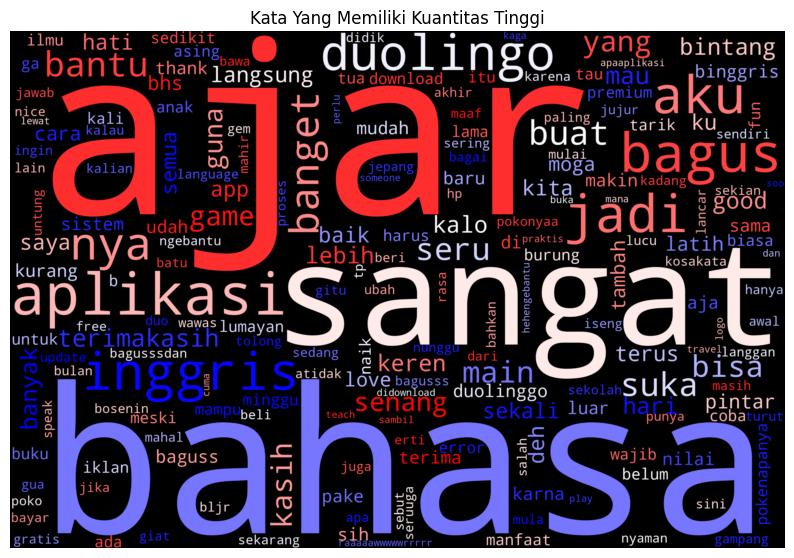

In [39]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


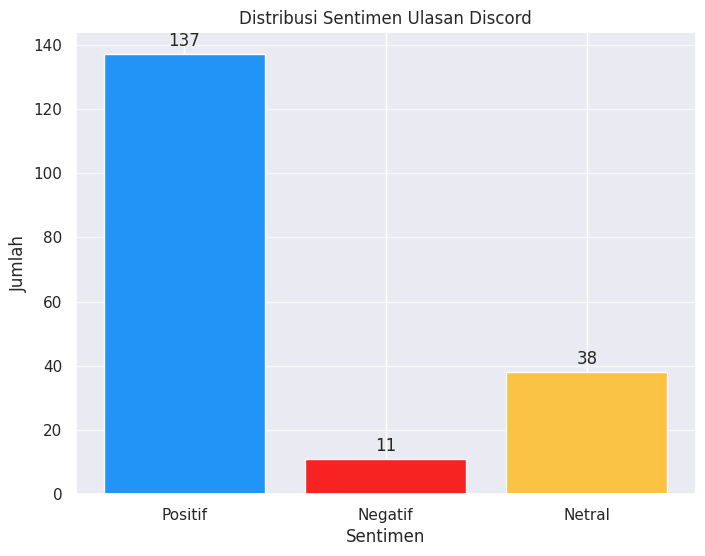

In [40]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Discord")


In [41]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,bagus banget,Very good.,Positif
1,sangat bagus ajar bahasa inggris sangat suka s...,Very nice English teaching very much. Very hel...,Positif
3,bagus aplikasi nya hehengebantu banget,It's great. It's really helpful.,Positif
4,keren aplikasi ubah logo aplikasi meski cuma d...,"fontcolor="" # FFFF00""cool app change the logo ...",Positif
5,this is soo fun i can play this game someone t...,this is so fun I can play this game someone te...,Negatif
...,...,...,...
177,very good,very good,Positif
178,baguss moga cepet binggris,"fontcolor="" # FFFF00""goodmoga fontcolor="" # FF...",Positif
179,terimakasih duolingo berkat mu moga impi ku ca...,"Thank you duolino. Thanks to you, I think I've...",Positif
181,duo nya imutduo is so cute,duo his cuteduo is so cute,Positif


In [42]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
0,bagus banget,Very good.,1
1,sangat bagus ajar bahasa inggris sangat suka s...,Very nice English teaching very much. Very hel...,1
3,bagus aplikasi nya hehengebantu banget,It's great. It's really helpful.,1
4,keren aplikasi ubah logo aplikasi meski cuma d...,"fontcolor="" # FFFF00""cool app change the logo ...",1
5,this is soo fun i can play this game someone t...,this is so fun I can play this game someone te...,0
...,...,...,...
177,very good,very good,1
178,baguss moga cepet binggris,"fontcolor="" # FFFF00""goodmoga fontcolor="" # FF...",1
179,terimakasih duolingo berkat mu moga impi ku ca...,"Thank you duolino. Thanks to you, I think I've...",1
181,duo nya imutduo is so cute,duo his cuteduo is so cute,1


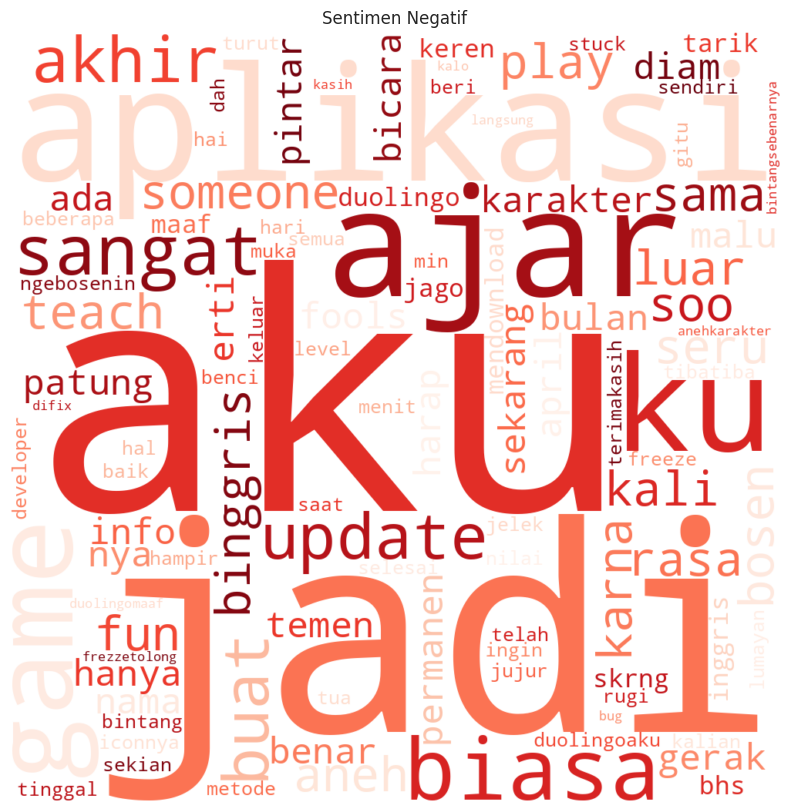

In [43]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

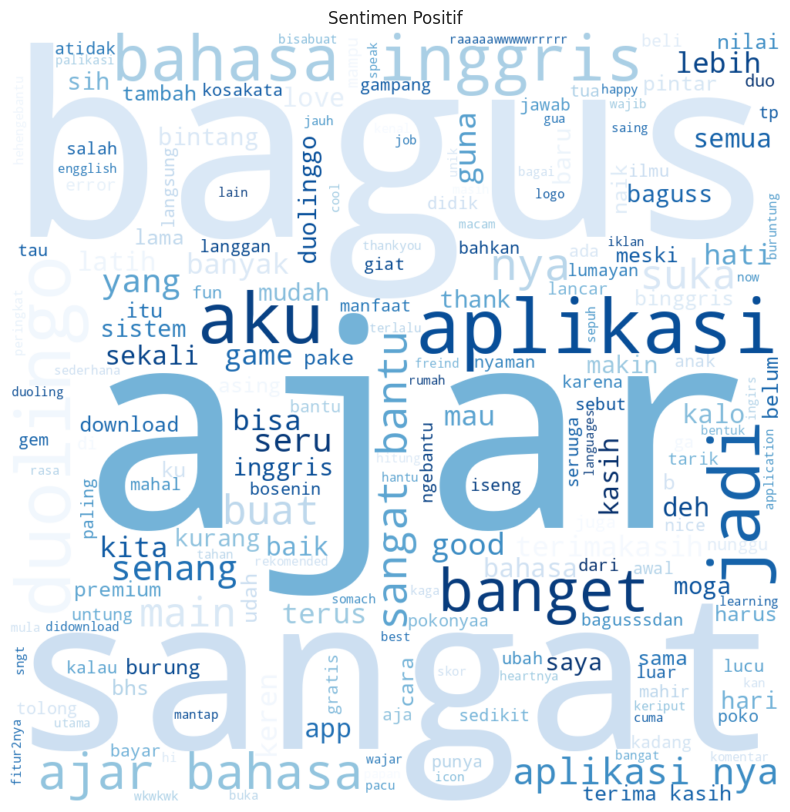

In [44]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [45]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
1    137
0     11
Name: count, dtype: int64

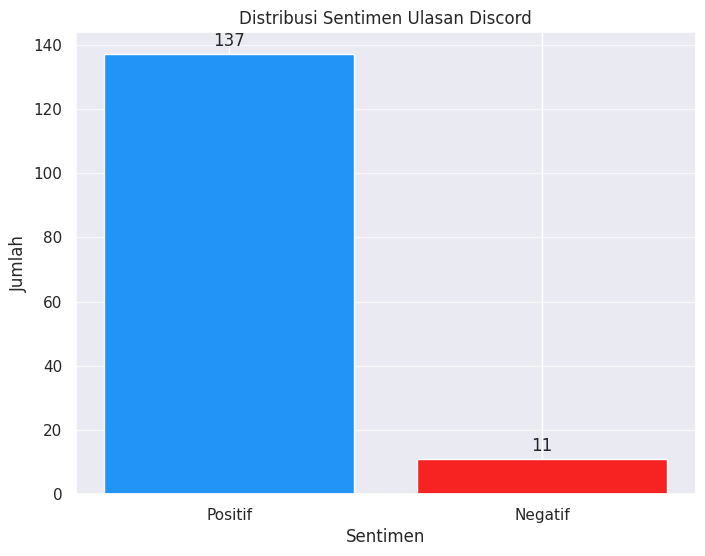

In [46]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Discord")

# **Data Preparation**

In [47]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [50]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [51]:
# Melakukan oversampling SMOTE pada data latih
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

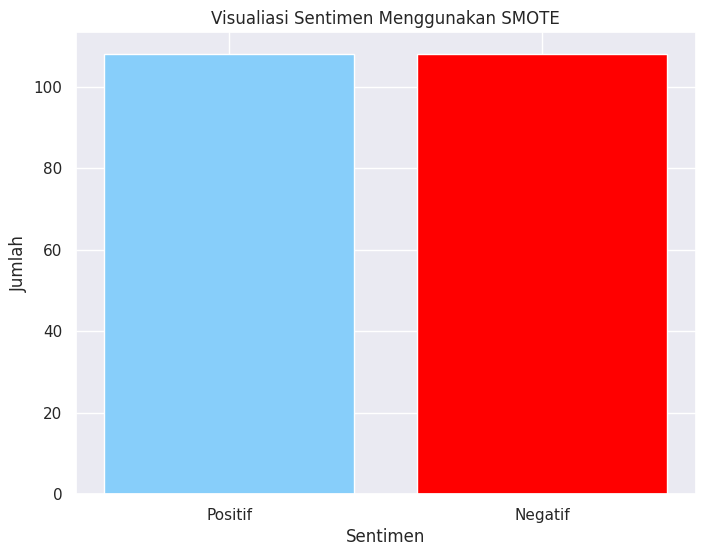

In [52]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['red', 'lightskyblue'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Negatif', 'Positif'])
plt.show()

# **Modeling**


In [53]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [54]:
y_pred = naive_bayes.predict(X_test_vec)

In [55]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Negatif', 'Positif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.8333333333333334

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.17      1.00      0.29         1
     Positif       1.00      0.83      0.91        29

    accuracy                           0.83        30
   macro avg       0.58      0.91      0.60        30
weighted avg       0.97      0.83      0.88        30



# **Testing**


In [56]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : aplikasinya sangat membantu dan bagus
Hasil Analisis Sentimen Untuk Teks Baru : Positif
